In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

from visualisation.generators import build_fib_graph
from visualisation.layouts import hierarchy_pos

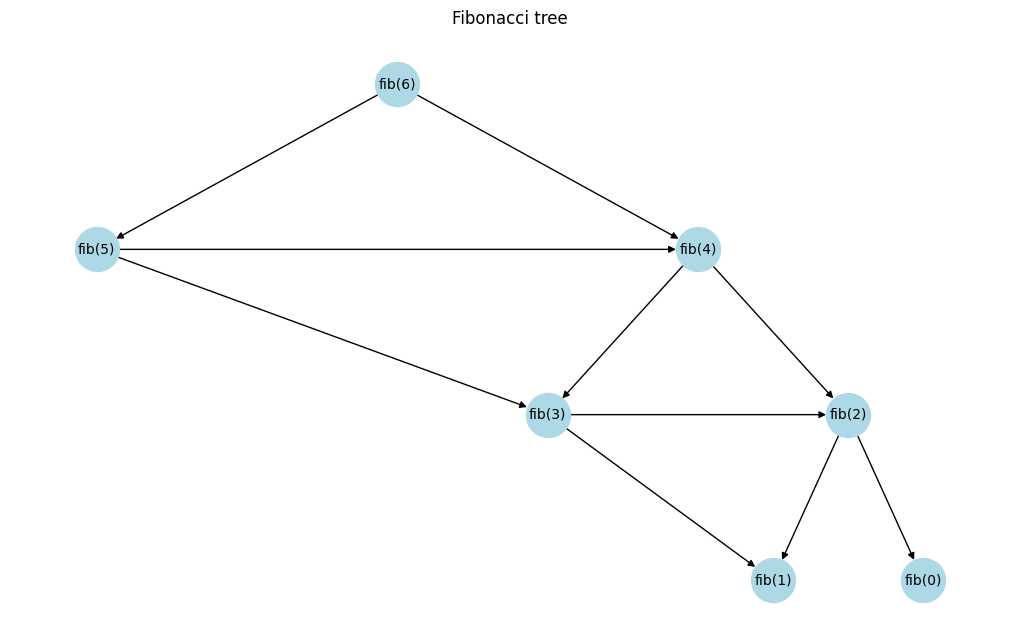

In [4]:
G = build_fib_graph(6)
pos = hierarchy_pos(G, root="fib(6)")

plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=1000,
    node_color="lightblue",
    font_size=10,
)
plt.title("Fibonacci tree")
plt.show()

In [5]:
# Time: O(2^n) Space: O(n)
def fib_recursive(n: int) -> int:
    if n == 0 or n == 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

In [6]:
fib_recursive(5)

5

In [7]:
fib_recursive(35)

9227465

In [8]:
fib_recursive(40)

102334155

In [9]:
# top-down: with memoization
# Time: O(n) Space: O(n)


def fib_memo(n: int, memo: dict[int, int] = None) -> int:
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n == 0 or n == 1:
        return n
    memo[n] = fib_memo(n - 1, memo=memo) + fib_memo(n - 2, memo=memo)
    return memo[n]

In [10]:
fib_memo(5)

5

In [11]:
fib_memo(35)

9227465

In [12]:
fib_memo(40)

102334155

In [13]:
fib_memo(100)

354224848179261915075

In [14]:
fib_memo(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [14]:
fib_memo(100000)  # stack overflow

RecursionError: maximum recursion depth exceeded

KeyboardInterrupt: 

In [1]:
# bottom-up: iterative
# with tabulation
# Time: O(n) or O(1) Space: O(n)


def fib_bottom_up(n):
    if n <= 1:
        return n
    dp = [0] * (n + 1)
    dp[0], dp[1] = 0, 1
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]

In [2]:
fib_bottom_up(10000)

3364476487643178326662161200510754331030214846068006390656476997468008144216666236815559551363373402558206533268083615937373479048386526826304089246305643188735454436955982749160660209988418393386465273130008883026923567361313511757929743785441375213052050434770160226475831890652789085515436615958298727968298751063120057542878345321551510387081829896979161312785626503319548714021428753269818796204693609787990035096230229102636813149319527563022783762844154036058440257211433496118002309120828704608892396232883546150577658327125254609359112820392528539343462090424524892940390170623388899108584106518317336043747073790855263176432573399371287193758774689747992630583706574283016163740896917842637862421283525811282051637029808933209990570792006436742620238978311147005407499845925036063356093388383192338678305613643535189213327973290813373264265263398976392272340788292817795358057099369104917547080893184105614632233821746563732124822638309210329770164805472624384237486241145309381220656491403